In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN



In [2]:
stations= pd.read_csv('Data/climate_station_list.csv')

df=pd.DataFrame(stations)

df.head()

,Station Name,Province,Latitude,Longitude,Elevation,Climate ID,WMO Identifier,TC Identifier,First Year,Last Year,HLY First Year,HLY Last Year,DLY First Year,DLY Last Year,MLY First Year,MLY Last Year
0,(AE) BOW SUMMIT,ALBERTA,51.70,-116.47,2080.0,3050PPF,NaN,NaN,1998,2007,NaN,NaN,1998.0,2007.0,1998.0,2007.0
1,100 MILE HOUSE,BRITISH COLUMBIA,51.65,-121.27,929.6,1095790,NaN,NaN,1957,1959,NaN,NaN,1957.0,1959.0,1957.0,1959.0
2,100 MILE HOUSE,BRITISH COLUMBIA,51.65,-121.30,1059.2,1165791,NaN,NaN,1970,1999,NaN,NaN,1970.0,1999.0,1970.0,1999.0
3,100 MILE HOUSE 6NE,BRITISH COLUMBIA,51.68,-121.22,928.0,1165793,NaN,NaN,1987,2023,NaN,NaN,1987.0,2023.0,1987.0,2007.0
4,108 MILE HOUSE,BRITISH COLUMBIA,51.75,-121.33,957.1,1095796,NaN,NaN,1970,1973,NaN,NaN,1970.0,1973.0,1970.0,1973.0


In [3]:
df.shape

(8552, 16)

Let's first check for duplicates:

In [4]:
df.duplicated().sum()

0

Since there are no duplicates in this Dataframe, we can move on to the next step.

Using Tableau, I was able to map out all the weather station locations in Canada. When mapping them out, there seems to have been a couple of stations that were out of place. It appears that the long and lat were set to 0. Let's drop these stations now:

Station Name
- MONTREAL PERSILLIER
- OSKELANEO 2
- PARRY SOUND ONT HYDRO
- RAMPART HOUSE
- ROWANS RAVINE PARK





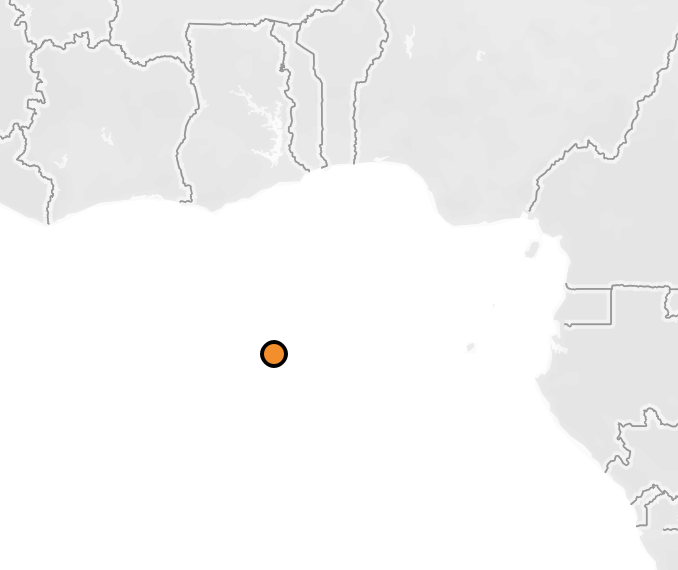

In [5]:
df.drop(index=df[df['Longitude'] == 0].index,inplace=True)

In [6]:
df.shape


(8547, 16)

Let's verify that those rows have been dropped

In [7]:
verify= df['Longitude'] ==0
verify.sum()

0

Now for this project we are looking for stations that would have information between 1990 and 2024. Our original df included information on when the stations went out of service under `Last Year`

In [8]:
df.head()

,Station Name,Province,Latitude,Longitude,Elevation,Climate ID,WMO Identifier,TC Identifier,First Year,Last Year,HLY First Year,HLY Last Year,DLY First Year,DLY Last Year,MLY First Year,MLY Last Year
0,(AE) BOW SUMMIT,ALBERTA,51.70,-116.47,2080.0,3050PPF,NaN,NaN,1998,2007,NaN,NaN,1998.0,2007.0,1998.0,2007.0
1,100 MILE HOUSE,BRITISH COLUMBIA,51.65,-121.27,929.6,1095790,NaN,NaN,1957,1959,NaN,NaN,1957.0,1959.0,1957.0,1959.0
2,100 MILE HOUSE,BRITISH COLUMBIA,51.65,-121.30,1059.2,1165791,NaN,NaN,1970,1999,NaN,NaN,1970.0,1999.0,1970.0,1999.0
3,100 MILE HOUSE 6NE,BRITISH COLUMBIA,51.68,-121.22,928.0,1165793,NaN,NaN,1987,2023,NaN,NaN,1987.0,2023.0,1987.0,2007.0
4,108 MILE HOUSE,BRITISH COLUMBIA,51.75,-121.33,957.1,1095796,NaN,NaN,1970,1973,NaN,NaN,1970.0,1973.0,1970.0,1973.0


We only want stations that show us data at least up to 1990. Let's drop all the other stations that can't provide that data. This will help further filter out some stations.

In [9]:
df.drop(index=df[df['Last Year'] < 1990].index,inplace=True)

Let's see how many stations we're left to work with now:

In [10]:
df.shape

(4505, 16)

In [11]:
#exporting new csv to visualize on Tableau
df.to_csv('Data/filtered_weather_map.csv')

Here's the new map after dropping ~4000 rows:

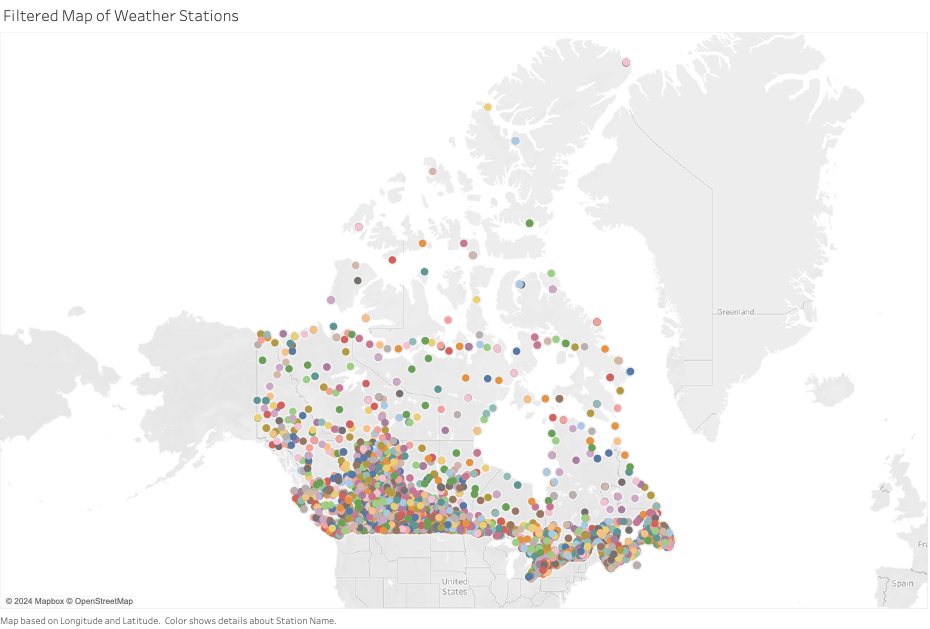

We were able to drop the amount of stations almost by half! Let's further bring down that number by using machine learning to cluster those stations, then select 1 station from every cluster to use as our reference. 

In [41]:
cluster_df=df

In [42]:
#DBSCAN parameters
epsilon = 0.4 #determining the radius around the point where other points may intersect
min_samples = 2 # determining the minimum number of points the radius will hit before being considered a core point 


dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit the model and predict the cluster labels
cluster_df['cluster_label'] = dbscan.fit_predict(df[['Latitude', 'Longitude']])

# Select one station from each cluster
# cluster_df = cluster_df.groupby('cluster_label').first()


In [57]:
cluster_df[cluster_df['cluster_label'].between(90,303)]

,Station Name,Province,Latitude,Longitude,Elevation,Climate ID,WMO Identifier,TC Identifier,First Year,Last Year,HLY First Year,HLY Last Year,DLY First Year,DLY Last Year,MLY First Year,MLY Last Year,cluster_label
1382,CHESTERFIELD INLET A,NUNAVUT,63.35,-90.73,9.8,2300710,NaN,YCS,2014,2024,2014.0,2024.0,2018.0,2024.0,NaN,NaN,90
1383,CHESTERFIELD INLET A,NUNAVUT,63.35,-90.73,9.8,2300707,NaN,YCS,1985,2014,1985.0,2013.0,1985.0,2014.0,1985.0,2007.0,90
1392,CHETWYND A,BRITISH COLUMBIA,55.69,-121.63,609.6,1181508,NaN,YCQ,1982,2024,1982.0,2014.0,1982.0,2024.0,1982.0,2007.0,91
1393,CHETWYND A,BRITISH COLUMBIA,55.69,-121.63,609.3,1181513,NaN,YCQ,2014,2024,2014.0,2024.0,2018.0,2024.0,NaN,NaN,91
1396,CHEVERY,QUEBEC,50.47,-59.64,7.7,7041382,71814.0,WDM,1992,2024,1994.0,2024.0,1992.0,2024.0,NaN,NaN,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8516,YELLOWKNIFE HYDRO,NORTHWEST TERRITORIES,62.67,-114.25,159.4,2204200,NaN,NaN,1943,2000,NaN,NaN,1943.0,2000.0,1943.0,2000.0,303
8517,YELLOWKNIFE-HENDERSON,NORTHWEST TERRITORIES,62.45,-114.38,200.0,2204110,NaN,NaN,2006,2021,NaN,NaN,2006.0,2021.0,2006.0,2007.0,303
8544,ZAMA LO,ALBERTA,58.58,-119.17,609.6,3078000,NaN,NaN,1961,2011,NaN,NaN,1961.0,2011.0,1961.0,2007.0,264
8545,ZEBALLOS,BRITISH COLUMBIA,49.98,-126.85,7.0,1039030,NaN,NaN,1955,1993,NaN,NaN,1955.0,1993.0,1955.0,1993.0,108


In [60]:
cluster_df[cluster_df['Latitude'].between(50,65)]

,Station Name,Province,Latitude,Longitude,Elevation,Climate ID,WMO Identifier,TC Identifier,First Year,Last Year,HLY First Year,HLY Last Year,DLY First Year,DLY Last Year,MLY First Year,MLY Last Year,cluster_label
0,(AE) BOW SUMMIT,ALBERTA,51.70,-116.47,2080.0,3050PPF,NaN,NaN,1998,2007,NaN,NaN,1998.0,2007.0,1998.0,2007.0,0
2,100 MILE HOUSE,BRITISH COLUMBIA,51.65,-121.30,1059.2,1165791,NaN,NaN,1970,1999,NaN,NaN,1970.0,1999.0,1970.0,1999.0,1
3,100 MILE HOUSE 6NE,BRITISH COLUMBIA,51.68,-121.22,928.0,1165793,NaN,NaN,1987,2023,NaN,NaN,1987.0,2023.0,1987.0,2007.0,1
5,108 MILE HOUSE ABEL LAKE,BRITISH COLUMBIA,51.62,-121.26,1005.0,109E7R6,NaN,NaN,1987,2020,NaN,NaN,1987.0,2020.0,1987.0,2007.0,1
11,ABBEY,SASKATCHEWAN,50.70,-108.78,694.9,4020020,NaN,NaN,1956,2008,NaN,NaN,1956.0,2008.0,1956.0,2007.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8538,YORKTON RCMP SNOW,SASKATCHEWAN,51.21,-102.46,503.0,4019095,NaN,NaN,2004,2013,NaN,NaN,2004.0,2013.0,2007.0,2007.0,11
8542,YOUNGSTOWN AGCM,ALBERTA,51.49,-111.22,800.0,3017705,NaN,PYT,2012,2024,2012.0,2024.0,2018.0,2024.0,NaN,NaN,0
8544,ZAMA LO,ALBERTA,58.58,-119.17,609.6,3078000,NaN,NaN,1961,2011,NaN,NaN,1961.0,2011.0,1961.0,2007.0,264
8547,ZEBALLOS MURAUDE CREEK,BRITISH COLUMBIA,50.05,-126.78,103.0,1039035,NaN,NaN,2010,2024,NaN,NaN,2010.0,2024.0,NaN,NaN,108


In [44]:
cluster_df.to_csv('Data/usable_stations_allclusters3.csv')

In [61]:
cluster_df[cluster_df['Latitude'].between(50,6)].to_csv('latitude_weathermaps.csv')

In [72]:
df_stations1 = pd.DataFrame(cluster_df[cluster_df['Latitude'].between(45,66)])

In [73]:
df_stations2= df_stations1.groupby('cluster_label').first()

In [74]:
df_stations2.shape

(266, 16)

In [76]:
df_stations2

Station Name       object
Province           object
Latitude          float64
Longitude         float64
Elevation         float64
Climate ID         object
WMO Identifier    float64
TC Identifier      object
First Year          int64
Last Year           int64
HLY First Year    float64
HLY Last Year     float64
DLY First Year    float64
DLY Last Year     float64
MLY First Year    float64
MLY Last Year     float64
dtype: object

In [75]:
df_stations2.to_csv('latitude_weathermaps3.csv')

In [67]:
#df_stations1[df_stations1['cluster_label'].between(70,303)]

In [3]:
stations2= pd.read_csv('Data/climate_station_list.csv')
stations2.drop(index=stations2[stations2['Longitude'] == 0].index,inplace=True)

In [4]:
stations2.drop(index=stations2[stations2['Last Year'] < 2022].index,inplace=True)

In [5]:
stations2.shape

(1502, 16)

In [6]:
stations2.drop(index=stations2[stations2['First Year'] > 1990].index,inplace=True)

In [9]:
stations2= stations2[stations2['Latitude'].between(45,66)]

In [10]:
stations2.shape

(390, 16)

In [11]:
stations2.to_csv('Test_list2.csv')

Now we have a reasonably sized list of weather stations to query. 